# 2D SDF functions

This notebook demonstrates the (batched) execution of all the 2D SDF functions available in the library. All of them are directly based on Inigo Quilez's excellent [article](https://iquilezles.org/www/articles/distfunctions2d/distfunctions2d.htm) on the subject.

In [1]:
import sys
delete_key = []
for key, value in sys.modules.items():
    if "geolipi" in key:
        delete_key.append(key)

for key in delete_key:
    del sys.modules[key]
    

In [2]:

sys.path.insert(0, "/home/aditya/projects/iccv_23/repos/geolipi/")
from geolipi.torch_compute.sketcher import Sketcher
from geolipi.torch_compute.sdf_functions_2d import *

In [3]:
import random
import numpy as np
import torch as th
import matplotlib.pyplot as plt
import _pickle as cPickle

In [4]:

device = th.device("cuda:0")
# resolution = 64
resolution = 256
n_dims = 2
sketcher = Sketcher(n_dims=n_dims, resolution=resolution)

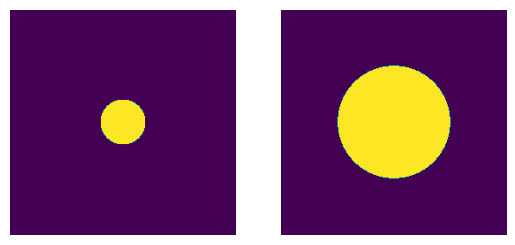

In [5]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r = th.tensor([[0.2], [0.5]]).to(device)
sdf = sdf2d_circle(points, r)
sdf = sdf.reshape(sdf.shape[0], resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

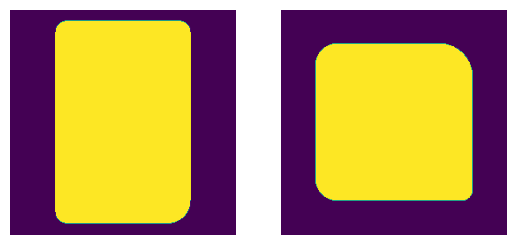

In [6]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
corner_radii = th.tensor([[0.2, 0.1, 0.1, 0.1], [0.1, 0.2, 0.3, 0.4]]).to(device) # * 0
size = th.tensor([[0.9, 0.6], [0.7, 0.7]]).to(device)
sdf = sdf2d_rounded_box(points, size, corner_radii)
sdf = sdf.reshape(sdf.shape[0], resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

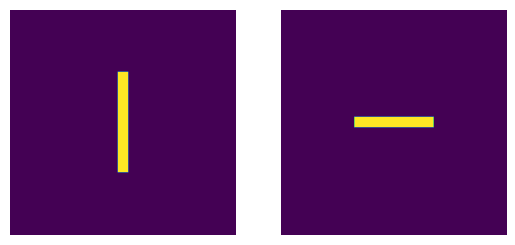

In [7]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
size = th.tensor([[0.9, 0.1], [0.1, 0.7]]).to(device)
sdf = sdf2d_box(points, size)
sdf = sdf.reshape(sdf.shape[0], resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

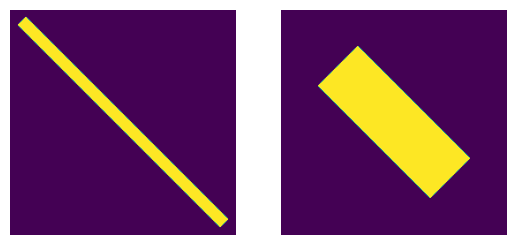

In [8]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
start_point = th.tensor([[0.9, 0.9], [0.5, 0.5]]).to(device)
end_point = th.tensor([[-0.9, -0.9], [-0.5, -0.5]]).to(device)
thickness = th.tensor([[0.1], [0.5]]).to(device)
sdf = sdf2d_oriented_box(points, start_point, end_point, thickness)

sdf = sdf.reshape(sdf.shape[0], resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

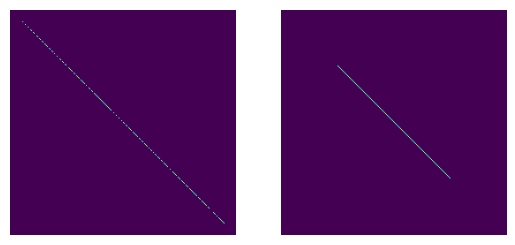

In [9]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
start_point = th.tensor([[0.9, 0.9], [0.5, 0.5]]).to(device)
end_point = th.tensor([[-0.9, -0.9], [-0.5, -0.5]]).to(device)
# points = points[1]
# start_point = start_point[1]
# end_point = end_point[1]

sdf = sdf2d_segment(points, start_point, end_point)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

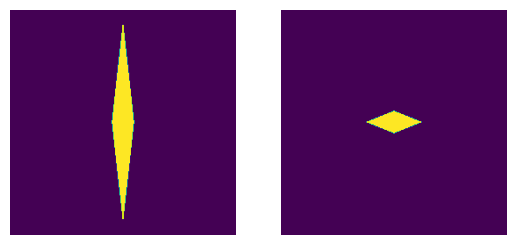

In [10]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
size = th.tensor([[0.9, 0.1], [0.1, 0.25]]).to(device)
# points = points[1]
# size = size[1]

sdf = sdf2d_rhombus(points, size)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

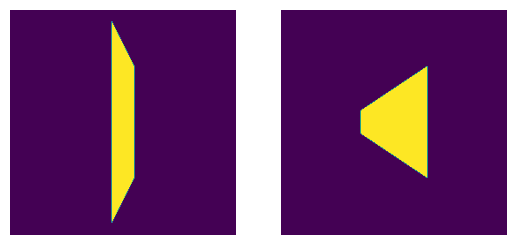

In [11]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r1 = th.tensor([[0.9], [0.1]]).to(device)
r2 = th.tensor([[0.5], [0.5]]).to(device)
height = th.tensor([[0.1], [0.3]]).to(device)
# points = points[1]
# r1 = r1[1]
# r2 = r2[1]
# height = height[1]

sdf = sdf2d_trapezoid(points, r1, r2, height)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

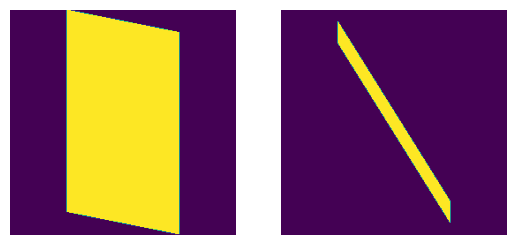

In [12]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
width = th.tensor([[0.9], [0.1]]).to(device)
height = th.tensor([[0.5], [0.5]]).to(device)
skew = th.tensor([[0.1], [0.8]]).to(device)
# points = points[1]
# width = width[1]
# height = height[1]
# skew = skew[1]

sdf = sdf2d_parallelogram(points, width, height, skew)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

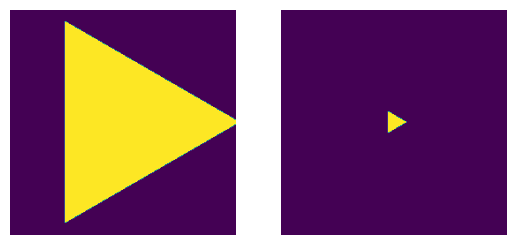

In [13]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
size_length = th.tensor([[0.9], [0.1]]).to(device)
# points = points[1]
# size_length = size_length[1]

sdf = sdf2d_equilateral_triangle(points, size_length)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

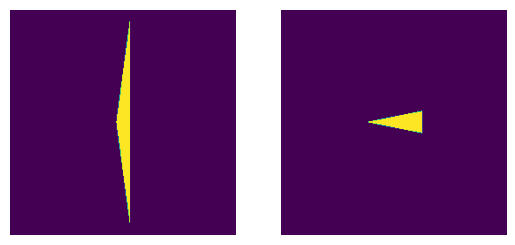

In [14]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
wi_hi = th.tensor([[0.9, 0.12], [0.1, 0.5]]).to(device)
# points = points[1]
# wi_hi = wi_hi[1]

sdf = sdf2d_isosceles_triangle(points, wi_hi)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

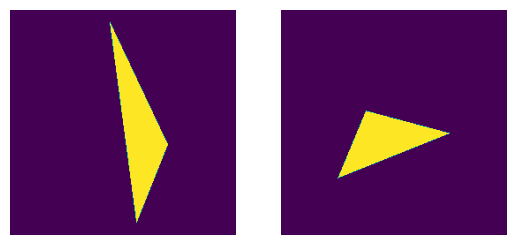

In [15]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
p0 = th.tensor([[0.9, 0.12], [0.1, 0.5]]).to(device)
p1 = th.tensor([[0.2, 0.4], [0.5, -0.5]]).to(device)
p2 = th.tensor([[-0.9, -0.12], [-0.1, -0.25]]).to(device)
# points = points[1]
# p0 = p0[1]
# p1 = p1[1]
# p2 = p2[1]

sdf = sdf2d_triangle(points, p0, p1, p2)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

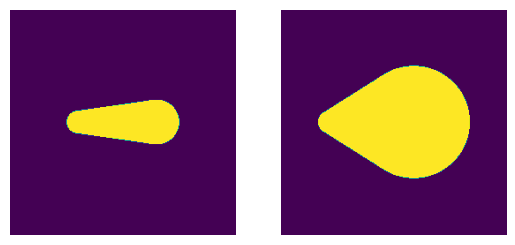

In [16]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r1 = th.tensor([[0.1], [0.1]]).to(device)
r2 = th.tensor([[0.2], [0.5]]).to(device)
h = th.tensor([[0.7], [0.75]]).to(device)
# points = points[1]
# r1 = r1[1]
# r2 = r2[1]
# h = h[1]

sdf = sdf2d_uneven_capsule(points, r1, r2, h)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

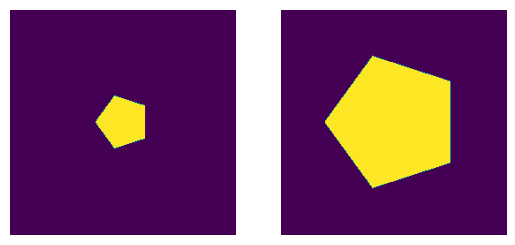

In [17]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r = th.tensor([[0.2], [0.5]]).to(device)
# points = points[1]
# r = r[1]

sdf = sdf2d_regular_pentagon(points, r)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

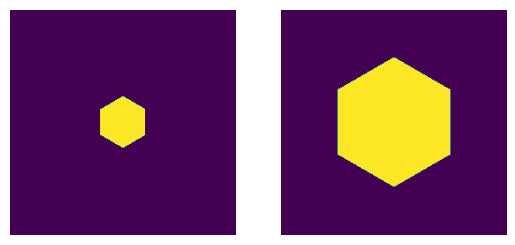

In [18]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r = th.tensor([[0.2], [0.5]]).to(device)
# points = points[1]
# r = r[1]

sdf = sdf2d_regular_hexagon(points, r)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

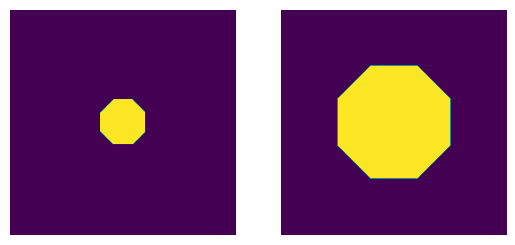

In [19]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r = th.tensor([[0.2], [0.5]]).to(device)
# points = points[1]
# r = r[1]

sdf = sdf2d_regular_octagon(points, r)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

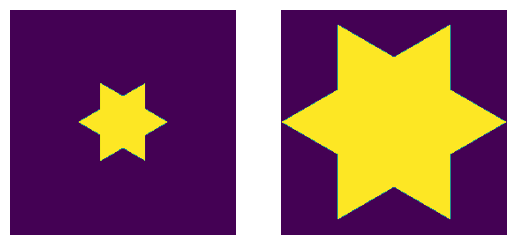

In [20]:
point_1, points_2 = (sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2], 0).to(device)
r = th.tensor([[0.2], [0.5]]).to(device)
# points = points[1]
# r = r[1]

sdf = sdf2d_hexagram(points, r)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(sdf.shape[0]):
    plt.subplot(1, 2, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

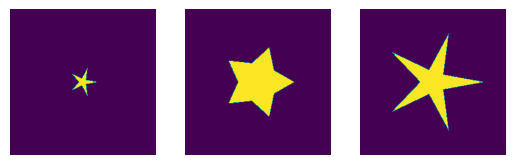

In [21]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.2], [0.5], [0.7]]).to(device)
rf = th.tensor([[0.2], [0.5], [0.2]]).to(device)
# points = points[1]
# r = r[1]
# rf = rf[1]

sdf = sdf2d_star_5(points, r, rf)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

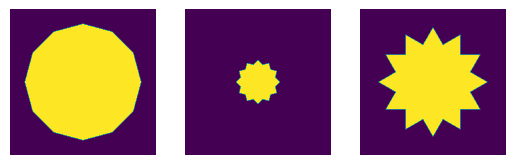

In [22]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.8], [0.3], [0.75]]).to(device)
n = th.tensor([[12], [12], [12]]).to(device)
m = th.tensor([[2], [3], [4]]).to(device)
# points = points[1]
# r = r[1]
# n = n[1]
# m = m[1]

sdf = sdf2d_regular_star(points, r, n, m)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

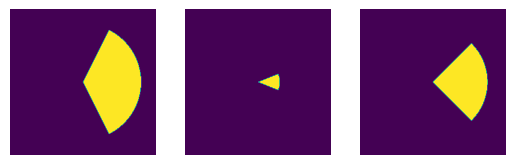

In [23]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.8], [0.3], [0.75]]).to(device)
c = th.tensor([[0.4, 0.2], [0.2, 0.5], [0.5, 0.5]]).to(device)
# points = points[1]
# r = r[1]
# n = n[1]
# m = m[1]

sdf = sdf2d_pie(points, c, r)

n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.7735, device='cuda:0') tensor(1.4469, device='cuda:0') torch.Size([3, 65536])


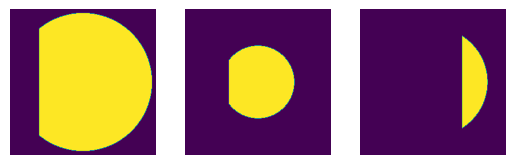

In [24]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.95], [0.5], [0.75]]).to(device)
h = th.tensor([[-0.6], [-0.4], [0.4]]).to(device)
# points = points[1]
# r = r[1]
# h = h[1]

sdf = sdf2d_cut_disk(points, r, h)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.4000, device='cuda:0') tensor(2.1639, device='cuda:0') torch.Size([3, 65536])


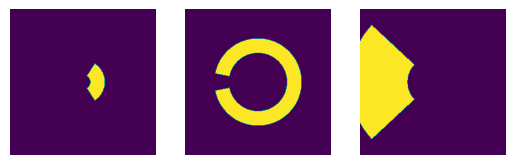

In [25]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
angle = th.tensor([[1], [np.pi-0.2], [-0.75]]).to(device)
ra = th.tensor([[0.2], [0.5], [0.75]]).to(device)
rb = th.tensor([[0.1], [0.1], [0.4]]).to(device)

# points = points[1]
# angle = angle[1]
# ra = ra[1]
# rb = rb[1]

sdf = sdf2d_arc(points, angle, ra, rb)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.5000, device='cuda:0') tensor(1.6152, device='cuda:0') torch.Size([3, 65536])


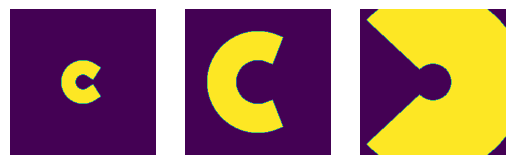

In [26]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.2], [0.5], [0.75]]).to(device)
angle = th.tensor([[1], [1.2], [-0.75]]).to(device)
w = th.tensor([[0.1, 0.1], [0.1, 0.2], [0.1, 0.5]]).to(device)

# points = points[1]
# angle = angle[1]
# r = r[1]
# w = w[1]

sdf = sdf2d_horse_shoe(points, angle, r, w)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.2960, device='cuda:0') tensor(1.2866, device='cuda:0') torch.Size([3, 65536])


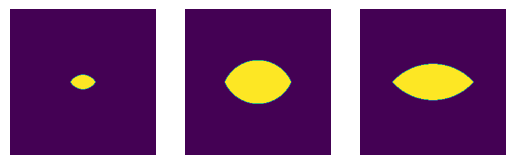

In [27]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
r = th.tensor([[0.2], [0.5], [0.75]]).to(device)
d = th.tensor([[0.1], [0.2], [0.5]]).to(device)

# points = points[1]
# r = r[1]
# d = d[1]

sdf = sdf2d_vesica(points, r, d)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.4893, device='cuda:0') tensor(1.6401, device='cuda:0') torch.Size([3, 65536])


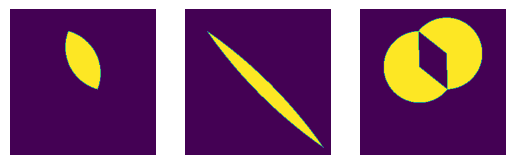

In [28]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
a = th.tensor([[0.1, 0.2], [0.9, 0.9], [0.1, 0.2]]).to(device)
b = th.tensor([[-0.7, -0.2], [-0.7, -0.7], [-0.7, -0.2]]).to(device)
w = th.tensor([[0.2], [0.1], [0.7]]).to(device)

# points = points[1]
# a = a[1]
# b = b[1]
# w = w[1]

sdf = sdf2d_oriented_vesica(points, a, b, w)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

tensor(-0.6980, device='cuda:0') tensor(1.2597, device='cuda:0') torch.Size([3, 65536])


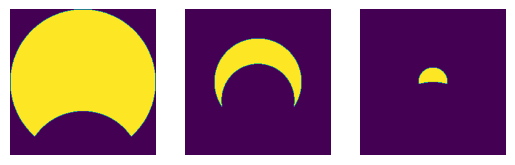

In [29]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
d = th.tensor([[1.2], [0.25], [0.7]]).to(device)
ra = th.tensor([[1.0], [0.6], [0.2]]).to(device)
rb = th.tensor([[0.8], [0.5], [0.7]]).to(device)

# points = points[1]
# d = d[1]
# ra = ra[1]
# rb = rb[1]

sdf = sdf2d_moon(points, d, ra, rb)
print(sdf.min(), sdf.max(), sdf.shape)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

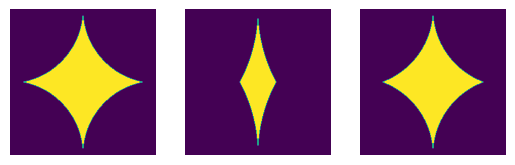

In [30]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
h = th.tensor([[1.2], [0.25], [0.7]]).to(device)

# points = points[1]
# h = h[1]

sdf = sdf2d_rounded_cross(points, h)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

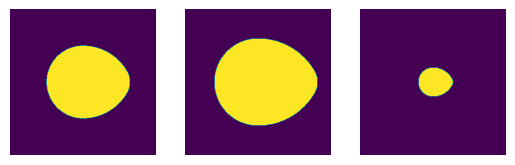

In [31]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
ra = th.tensor([[0.5], [0.6], [0.2]]).to(device)
rb = th.tensor([[0.3], [0.3], [0.1]]).to(device)


# points = points[1]
# ra = ra[1]
# rb = rb[1]

sdf = sdf2d_egg(points, ra, rb)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

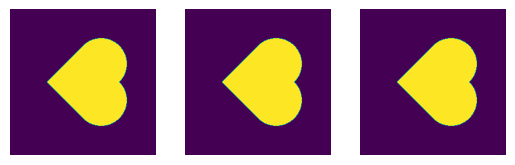

In [32]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)


# points = points[1]

sdf = sdf2d_heart(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

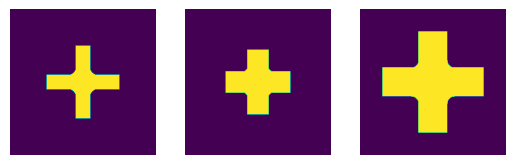

In [33]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
b = th.tensor([[0.6, 0.2], [0.5, 0.2], [0.8, 0.3]]).to(device)
r = th.tensor([[0.1], [0.05], [0.1]]).to(device)


# points = points[1]
# b = b[1]
# r = r[1]

sdf = sdf2d_cross(points, b, r)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

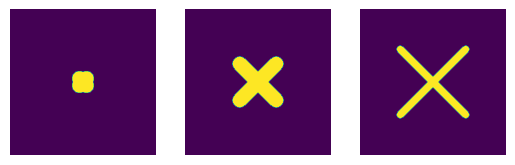

In [34]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
w = th.tensor([[0.1], [0.5], [0.9]]).to(device)
r = th.tensor([[0.1], [0.1], [0.05]]).to(device)


# points = points[1]
# w = w[1]
# r = r[1]

sdf = sdf2d_rounded_x(points, w, r)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

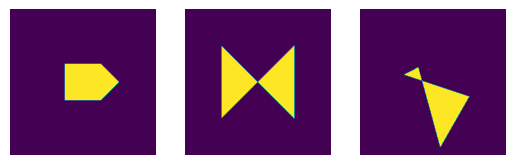

In [35]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
vertices = th.tensor([[[0.25, 0.25], [0.25, -0.25], [-0.25, -0.25], [-0.25, 0.25], [0, 0.5]],
                      [[0.5, 0.5], [-0.5, -0.5], [0.5, -0.5], [-0.5, 0.5], [-0.5, 0.50]],
                      [[-0.1, -0.4], [0.2, 0.5], [0.9, 0.1], [-0.2, -0.2], [-0.2, -0.21]]]).to(device)
vert_mask = th.tensor([[4], [3], [3]]).to(device)

# points = points[0]
# vertices = vertices[0]
# vert_mask = vert_mask[0]

sdf = sdf2d_polygon(points, vertices)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

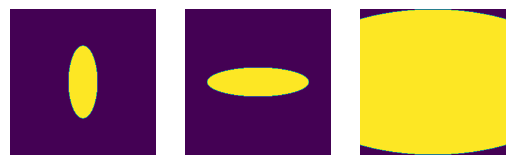

In [36]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
ab = th.tensor([[0.5, 0.2], [0.2, 0.7], [1, 2]]).to(device)

# points = points[0]
# ab = ab[0]

sdf = sdf2d_ellipse(points, ab)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

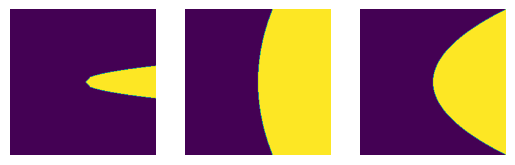

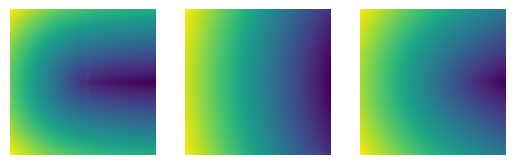

In [40]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
k = th.tensor([[20], [0.2], [1]]).to(device)

# points = points[0]
# k = k[0]

sdf = sdf2d_parabola(points, k)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

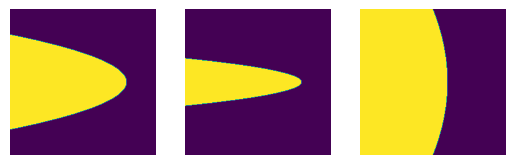

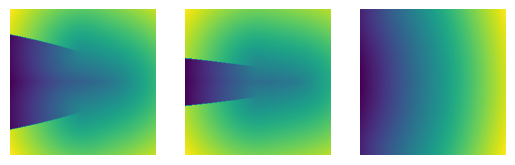

In [41]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
wi = th.tensor([[0.4], [0.2], [1]]).to(device)
he = th.tensor([[0.6], [0.6], [0.2]]).to(device)

# points = points[0]
# k = k[0]

sdf = sdf2d_parabola_segment(points, wi, he)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

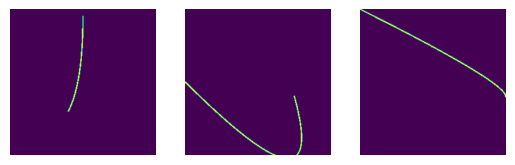

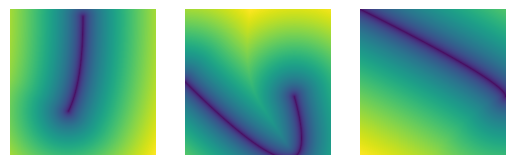

In [43]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
A = th.tensor([[0.4, -0.2], [0.2, 0.5], [-1, -1]]).to(device)
B = th.tensor([[0, 0], [2., 1], [0, 1]]).to(device)
C = th.tensor([[-0.9, 0], [0.,-1], [0.2, 1]]).to(device)
points = points[0]
# A = A[0]
# B = B[0]
# C = C[0]

sdf = sdf2d_quadratic_bezier_curve(points, A, B, C)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.1
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

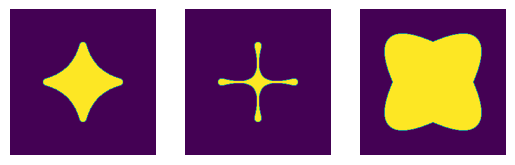

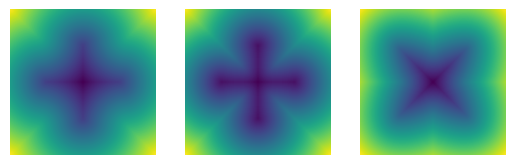

In [44]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
he = th.tensor([[0.2], [0.6], [-0.9]]).to(device)

# points = points[0]
# he = he[0]

sdf = sdf2d_blobby_cross(points, he)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.1
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

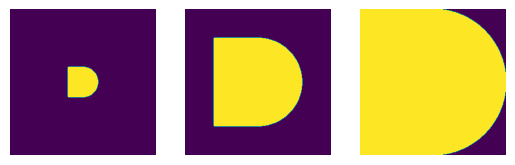

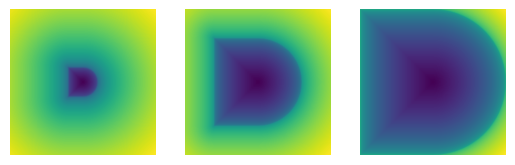

In [46]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
wh = th.tensor([[0.2], [0.6], [1]]).to(device)

# points = points[0]
# wh = wh[0]

sdf = sdf2d_tunnel(points, wh)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.1
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

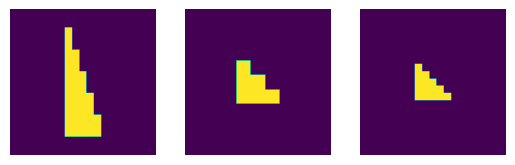

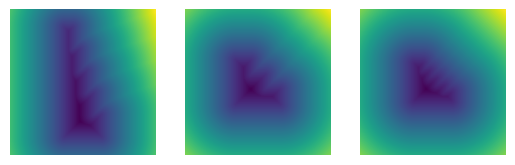

In [47]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
wh = th.tensor([[0.3, 0.1], [0.2, 0.2], [0.1, 0.1]]).to(device)
n = th.tensor([[5], [3], [5]]).to(device)

# points = points[0]
# wh = wh[0]
# n = n[0]

sdf = sdf2d_stairs(points, wh, n)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

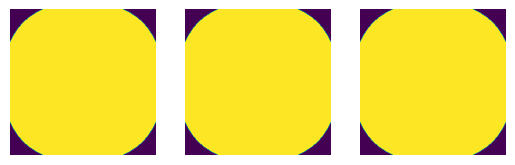

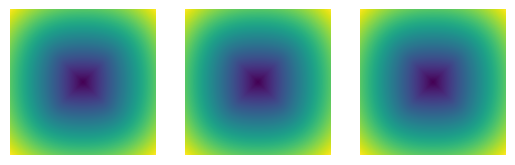

In [48]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)

# points = points[0]

sdf = sdf2d_quadratic_circle(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.1
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

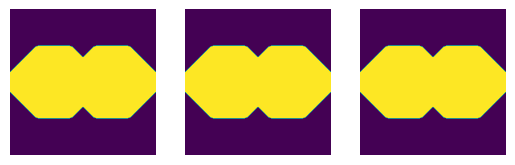

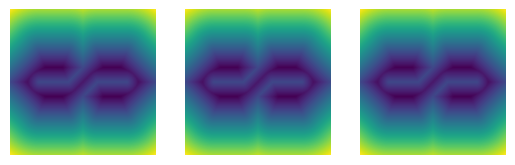

In [49]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)

# points = points[0]

sdf = sdf2d_cool_s(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf <=0.1
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

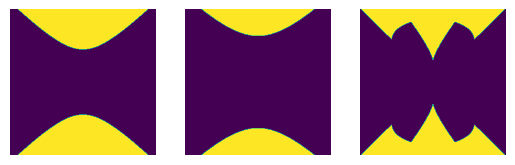

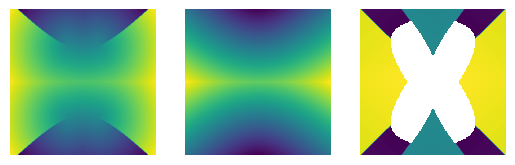

In [50]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
k = th.tensor([[0.1], [0.2], [0.01]]).to(device)
he = th.tensor([[0.2], [8], [8]]).to(device)

# points = points[0]
# k = k[0]
# he = he[0]

sdf = sdf2d_hyperbola(points, k, he)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

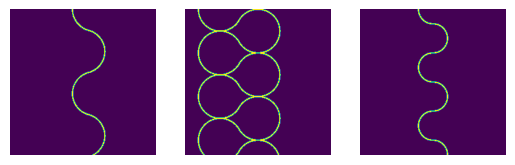

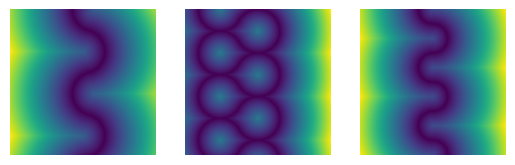

In [51]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)
tb = th.tensor([[0.5], [1], [0.6]]).to(device)
ra = th.tensor([[0.3], [0.3], [0.2]]).to(device)

# points = points[0]
# tb = tb[0]
# ra = ra[0]

sdf = sdf2d_circle_wave(points, tb, ra)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf<=0.01
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

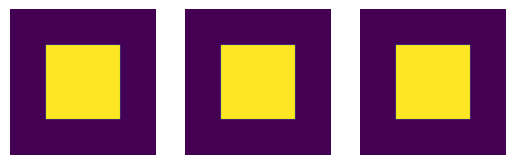

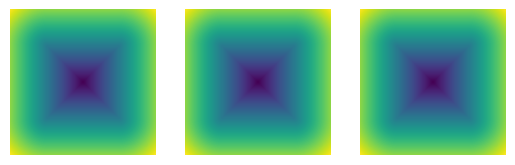

In [52]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)

# points = points[0]

sdf = sdf2d_no_param_rectangle(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf<=0.01
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

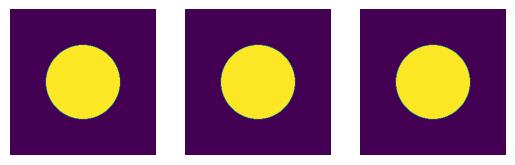

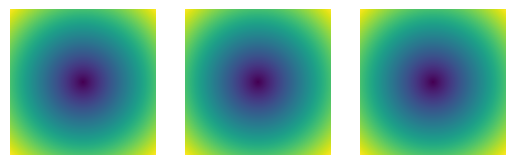

In [53]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)

# points = points[0]

sdf = sdf2d_no_param_circle(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf<=0.01
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")

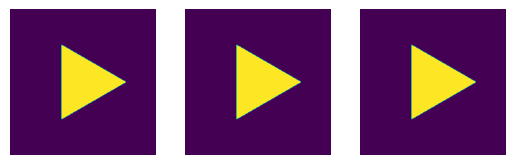

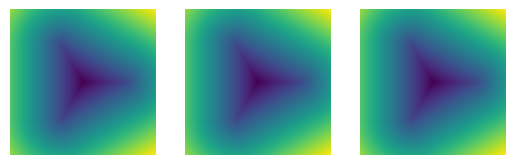

In [54]:
point_1, points_2, points_3 = (sketcher.get_base_coords(), sketcher.get_base_coords(), sketcher.get_base_coords())
points = th.stack([point_1, points_2, points_3], 0).to(device)

# points = points[0]

sdf = sdf2d_no_param_triangle(points)
n_dim = sdf.numel()//(resolution*resolution)
sdf = sdf.reshape(n_dim, resolution, resolution).cpu().numpy()
occ = sdf<=0.01
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")
plt.figure()
occ = sdf #<=0.0
for i in range(n_dim):
    plt.subplot(1, n_dim, i+1)
    plt.imshow(occ[i])
    plt.axis("off")